Interactive sketches
=============



So fare we have used Jupyter notebooks to read, take notes (hopefully:)) and draw. However, Py5Canvas also allows you to create interactive sketches in a way that is very similar to P5js. Once you have read this notebook, you will be able to look at the examples in [this repository](https://github.com/colormotor/py5canvas-examples) and execute them easily from Visual Studio Code.  

Similarly to P5js, a Py5Canvas sketch has a `setup` and a `draw` function. You create your canvas in `setup` as you did in the notebooks, and put your drawing code into `draw`. Here is what a basic sketch but you cannot run it from a notebook.

```Python
from py5canvas import *

def setup():
    create_canvas(512, 512)

def draw():
    background(0)
    circle(width/2, height/2, 100)

run()
```

The sketch structure is very similar to the one of a P5js sketch, but it requires writing `from py5canvas import *`, which gives us all the functionality of Py5Canvas, and writing `run()` at the very end, which starts the "engine" that allows to run interactive sketches.

We cannot run this in a notebook, but we will have to create a Python source code file instead and run it. First, from Visual Studio Code we will create a new file **with the &ldquo;.py&rdquo; extension** (which stands for a "Python" source code file), e.g. "test_sketch.py". Then we will copy the contents of the code above into the file and save.
To run the sketch, make sure the file is open and select the correct Python environment for the given file. The operation is similar to what we did with notebooks, but we need to select the environment from a dropdown menu located on the lower right, it will look something like this:

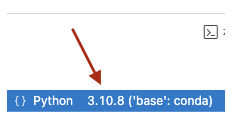

Clicking on the Python version will show a menu on the top that should allow to choose the "py5" environment we have previously created. Now, to run the sketch, press the little "play" button on the top right, something like this:

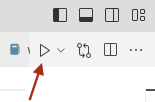

This should open a terminal in the bottom of your editor and run the script. 

- **NOTE** Once the script is running, you will be able to edit it and see the changes every time you save, similarly to the "Go Live" option with Javascript in Visual Studio code. If you make errors, these will appear in the terminal at the bottom.

# How sketches work 
Sketches allow us to add interactivity to our graphics, as the `draw` function is being called regularly as if it where in a loop. The `setup()` function is  called once, and it contains the initialization of the sketch (e.g. creating the canvas). Imagine something like this behind the hood:

```Python
setup()

while sketch_window_is_open:
    draw()
```

We have created the `setup` and `draw` functions so what we write inside the `setup` function (in the indentend block following `def setup():`) will be executed once and what we write inside the `draw` function (after `def draw():`) will be executed repeatedly, until the user closes the window:

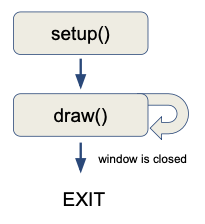

As a result we can create animations by changing things in time during the procedures defined in `draw`. 

# Creating animations

To create animations, it is useful to use the `frame_count` property, which is a variable defined automatically that always gives us the current frame since the sketch has started:

```Python
from py5canvas import *

def setup():
    create_canvas(512, 512)

def draw():
    background(0)
    y = sin(frame_count*0.01)*height*0.5
    circle(width/2, 
           height/2 + y,
           100)
    print(frame_count)
    
run()
```

Here we use a function `sin` that we have not seen before. We will use it a lot but for now (if you are not familiar with it) think of it as a little box that takes any number as an input and spits out a value that oscillates between -1 and 1:

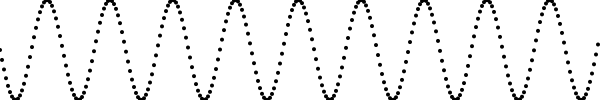

In [27]:
from py5canvas import *
create_canvas(600, 100)
background(255)
fill(0)
no_stroke()
x = 0
while x < width:
    y = sin(x*0.1)*height/2
    circle(x, height/2 + y, 2)
    x += 2
show()


 The input number is an angle expressed in [radians](https://en.wikipedia.org/wiki/Radian), so you can think of it as a position along a circle. The `cos` function is similar, try to draw a circle with a Y position determined by `cos` instead of `sin`. For a challenge, you can try to use both to draw a point along a circle? (hint, use `cos` in the X). We will cover this in detail but not today. Finally, try to take this notebook code and put it into a sketch with the appropriate `setup` and `draw` function. See the previous sketch scripts for examples, but remember you cannot run an interactive sketch inside a notebook!

 # Remap
 In the code above we had to do two things that can be made easier with Py5Canvas functionality. First, we often wanted to draw from the vertical center of the canvas so we always add `height/2` to our Y coordinates. Second, we often scaled values between one range (e.g. between -1 and 1) to another (e.g. between `-height/2` and `height/2`). 

 We can simplify the code using a function called `remap`. In Javascript/Processing it is called [`map`](https://p5js.org/reference/p5/map/) but that is a built in construct in Python so we will use `remap` instead. 
The `remap` function converts a number from an input range (2 values) into an output range (2 other values). It takes 5 numbers, in order: 

- A first number is the input value. 
- Two more numbers are the input range.
- Two last numbers are the output range.

For example
 

In [23]:
remap(1, -1, 1, -width/2, width/2)

300.0

re-maps the input value from the range between `-1` and `1` to the range between `-width/2`, `width/2`. The ranges can be anything, for example distances in pixels or units of measure. E.g. using `remap` to convert from centimeters to inches we can set the input range to be `0` to the number of cm in an inch (`2.54`) and the output range to be between zero and one (inches). So we write:

In [28]:
remap(10, (0, 2.54), (0, 1))

3.937007874015748

Here we used a different but valid syntax that can help readability, where we group the input and output ranges into parentheses (this is called a `tuple`). If we flip the two ranges, we will get a conversion from inches to inches to centimeters. So now let's use it to simplify the code: 

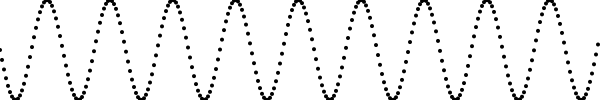

In [29]:
create_canvas(600, 100)
background(255)
fill(0)
no_stroke()
x = 0
while x < width:
    y = remap(sin(x*0.1), -1, 1, 0, height)
    circle(x, y, 2)
    x += 2
show()

It is useful to also see how we could write the `remap` function ourselves, for example this will work identically to the `remap` function provided by Py5Canvas.

In [24]:
def my_remap(value, start1, stop1, start2, stop2):
    t = ((value - start1) / (stop1 - start1))
    return start2 + (stop2 - start2) * t

my_remap(1, -1, 1, -width/2, width/2)

300.0

## Translate
 We can tell the canvas we want to draw from a different position using the `translate(x, y)` function. All the drawing commands that follow will be shifted by the amount specified in `x` and `y`. So for example we can write

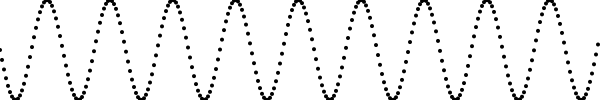

In [30]:
create_canvas(600, 100)
background(255)
fill(0)
no_stroke()
translate(0, height/2)
x = 0
while x < width:
    y = sin(x*0.1)*height/2
    circle(x, y, 2)
    x += 2
#fill(255, 0, 0)
#circle(0, 0, 15)
show()

And we will get the same result but now the Y coordinate 0 is in the middle of the canvas. You can see this by uncommenting the two lines of code before `show()`. In practice, `translate` applies a transformation to the canvas, but we will go into more detail in the next session. 


<style>.csl-entry{text-indent: -1.5em; margin-left: 1.5em;}</style><div class="csl-bib-body">
</div>



# Conversion from P5js/Processing

As previously mentioned, many functionalities in Py5canvas are very similar to its Java and Javascript counterparts. As a result, many existing tutorials as well as examples on the web or your code can be easily adapted by keeping in mind the different language and syntax conventions. 

A barebones P5js/Processing sketch looks something like this:

```Javascript

function setup(){
    createCanvas(400, 400);
}

function draw(){
    background(0);
    circle(width/2, height/2, 100);
}
```

The corresponding Py5Canvas sketch looks like this:

```Python
from py5canvas import *

def setup():
    create_canvas(400, 400)

def draw():
    background(0)
    circle(width/2, height/2, 100)

run()
```

We need the first line to import py5canvas so that all the functionalities in the library are available. We need to call `run()` at the end so that the drawing loop starts and we are able to see changes in the sketch when we save the corresponding source code file. 

For the rest, we need to keep in mind that function definitions and syntax in Python is different, e.g.:

- Function definitions are different (e.g `def setup():` followed by a tab).
- Comments are preceded by the `#` character instead of `//`.

And that Py5canvas uses the "snake_case" naming convention as opposed to "camelCase", e.g.:

- Functions like `createCanvas` become `create_canvas`